In [1]:
# Modified from Jimmy Chang's codes

In [2]:
from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers.core import Dense, Activation

batch_size = 128
num_classes = 10
epochs = 12

# input image dimensions
img_rows, img_cols = 28, 28

# the data, shuffled and split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

c:\users\silver\appdata\local\programs\python\python35\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [3]:
print("training inputs",x_train.shape)
print("training labels",y_train.shape)
print("testing inputs",x_test.shape)
print("testing inputs",y_test.shape)

training inputs (60000, 28, 28)
training labels (60000,)
testing inputs (10000, 28, 28)
testing inputs (10000,)


In [4]:
x_train = x_train.reshape(x_train.shape[0], img_rows*img_cols)
x_test = x_test.reshape(x_test.shape[0], img_rows*img_cols)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [5]:
print("training inputs",x_train.shape)
print("training labels",y_train.shape)
print("testing inputs",x_test.shape)
print("testing inputs",y_test.shape)

training inputs (60000, 784)
training labels (60000, 10)
testing inputs (10000, 784)
testing inputs (10000, 10)


In [6]:
print('Building current best model with EarlyStopping')
model_adam = Sequential()
model_adam.add(Dense(512, input_dim=x_train.shape[1]))
model_adam.add(Activation('relu'))
model_adam.add(Dense(512))
model_adam.add(Activation('relu'))
model_adam.add(Dense(10))
model_adam.add(Activation('softmax'))

Building current best model with EarlyStopping


In [7]:
''' EarlyStopping '''
from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor = 'val_loss', min_delta=0.0001, patience = 3)

''' Set up the optimizer '''
from keras.optimizers import SGD, Adam, RMSprop, Adagrad

''' Compile model with specified loss and optimizer '''
model_adam.compile(loss= 'categorical_crossentropy',
                   optimizer='Adam',
                   metrics=['accuracy'])
''' set the size of mini-batch and number of epochs'''
batch_size = 16
epochs = 30

'''Fit models and use validation_split=0.1 '''
history_adam = model_adam.fit(x_train, y_train,
                              batch_size=batch_size,
                              epochs=epochs,
                              verbose=1,
                              shuffle=True,
                              validation_split=0.1,
                              callbacks=[early_stopping])

Train on 54000 samples, validate on 6000 samples
Epoch 1/30
54000/54000 [==============================] - 25s 454us/step - loss: 0.1937 - acc: 0.9406 - val_loss: 0.0980 - val_acc: 0.9707
Epoch 2/30
54000/54000 [==============================] - 22s 415us/step - loss: 0.0901 - acc: 0.9722 - val_loss: 0.0751 - val_acc: 0.9773
Epoch 3/30
54000/54000 [==============================] - 22s 415us/step - loss: 0.0645 - acc: 0.9803 - val_loss: 0.0782 - val_acc: 0.9773
Epoch 4/30
54000/54000 [==============================] - 23s 423us/step - loss: 0.0507 - acc: 0.9837 - val_loss: 0.0802 - val_acc: 0.9797
Epoch 5/30
54000/54000 [==============================] - 23s 422us/step - loss: 0.0410 - acc: 0.9877 - val_loss: 0.0732 - val_acc: 0.9822
Epoch 6/30
54000/54000 [==============================] - 22s 410us/step - loss: 0.0352 - acc: 0.9895 - val_loss: 0.0919 - val_acc: 0.9795
Epoch 7/30
54000/54000 [==============================] - 22s 408us/step - loss: 0.0336 - acc: 0.9899 - val_loss: 0.0

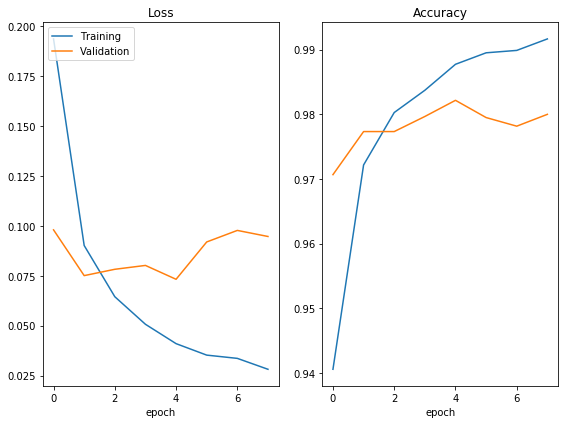

Result saved into 07_earlystopping.png


In [9]:
'''Access the loss and accuracy in every epoch'''
loss_adam = history_adam.history.get('loss')
acc_adam = history_adam.history.get('acc')
val_loss_adam = history_adam.history.get('val_loss')
val_acc_adam = history_adam.history.get('val_acc')

''' Visualize the loss and accuracy of both models'''
import matplotlib.pyplot as plt
plt.figure(0,figsize=(8,6))
plt.subplot(121)
plt.plot(range(len(loss_adam)), loss_adam,label='Training')
plt.plot(range(len(val_loss_adam)), val_loss_adam,label='Validation')
plt.title('Loss')
plt.xlabel("epoch")
plt.legend(loc='upper left')
plt.subplot(122)
plt.plot(range(len(acc_adam)), acc_adam,label='Training')
plt.plot(range(len(val_acc_adam)), val_acc_adam,label='Validation')
plt.title('Accuracy')
plt.xlabel("epoch")
plt.tight_layout()
plt.savefig('07_earlystopping.png',dpi=300,format='png')
plt.show()
plt.close()
print('Result saved into 07_earlystopping.png')